In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


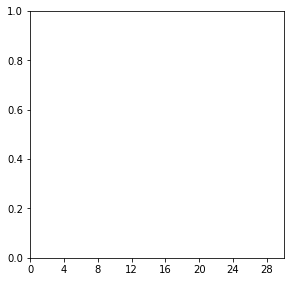

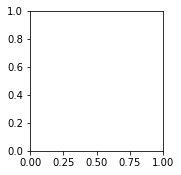

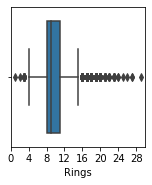

In [7]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.displot(df['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(df['Rings'])

/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

ValueError: num must be 1 <= num <= 9, not 10

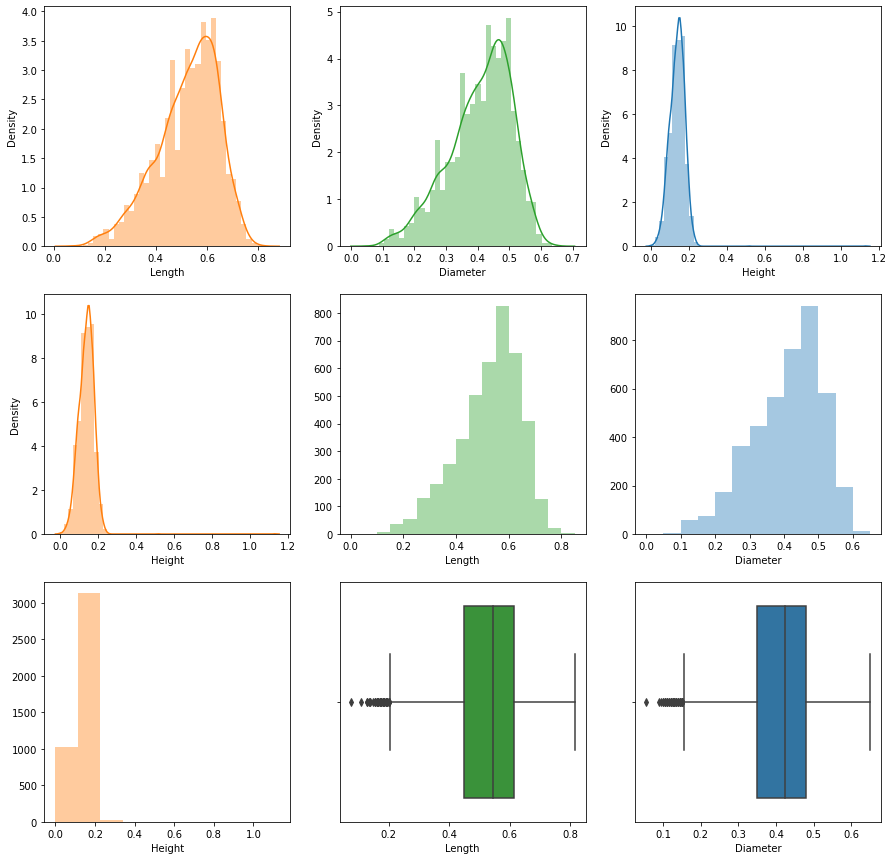

In [9]:
import numpy as np
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], color=colors[i % 3])
 
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Height'], color=colors[i % 3])

/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

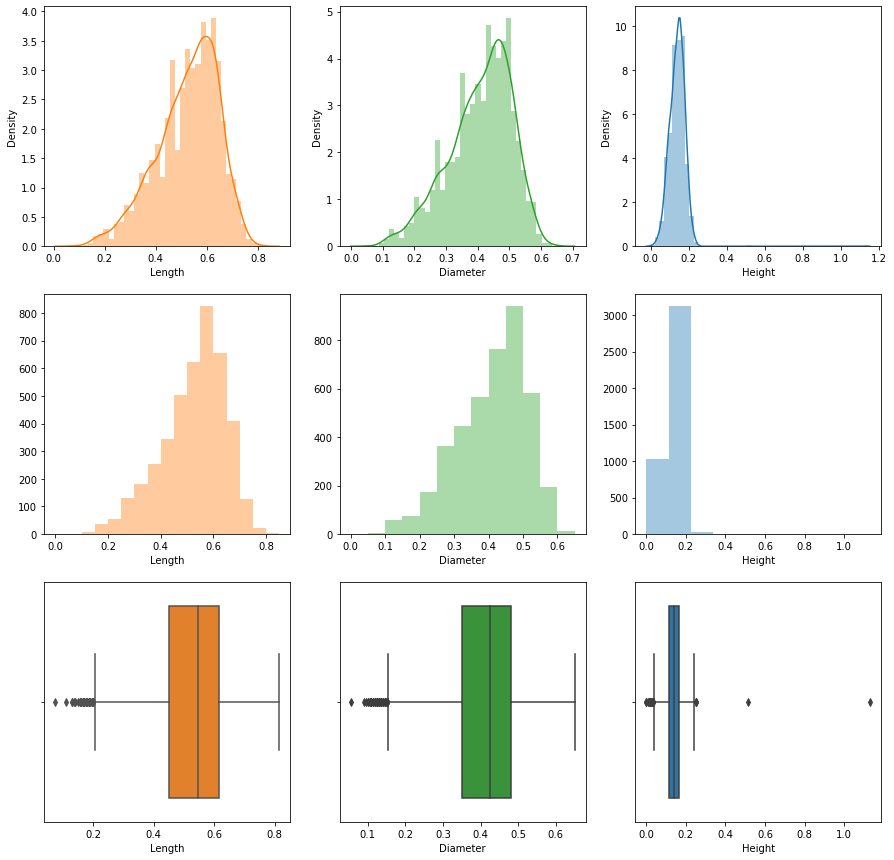

In [10]:
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(df['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Height'], color=colors[i % 3])

/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

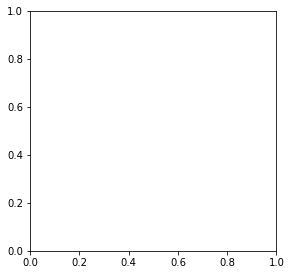

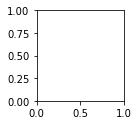

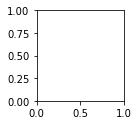

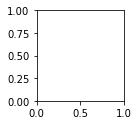

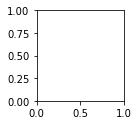

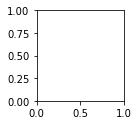

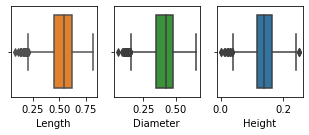

In [11]:
# removing outliers 
df = df[df['Height'] < 0.4]

plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.displot(df['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.displot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.displot(df['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.displot(df['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.displot(df['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.displot(df['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(df['Height'], color=colors[i % 3])

/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

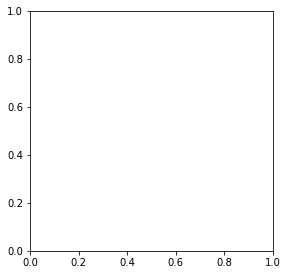

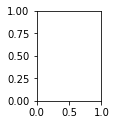

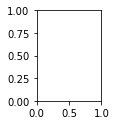

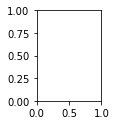

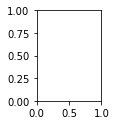

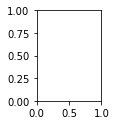

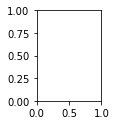

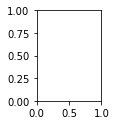

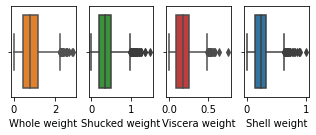

In [12]:
plt.figure(figsize=(20, 15))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Whole weight'], color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Shell weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Whole weight'], kde=False, bins=14, color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Shucked weight'], kde=False, bins=14, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Viscera weight'], kde=False, bins=16, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.displot(df['Shell weight'], kde=False, bins=20, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['Whole weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['Shell weight'], color=colors[i % cols])

/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


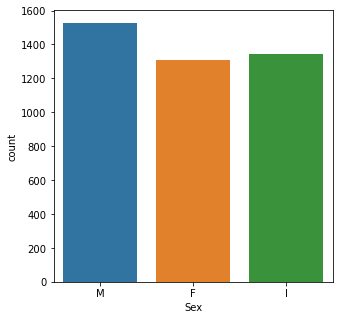

In [13]:
plt.figure(figsize=(5,5))
_ = sns.countplot(df.Sex)

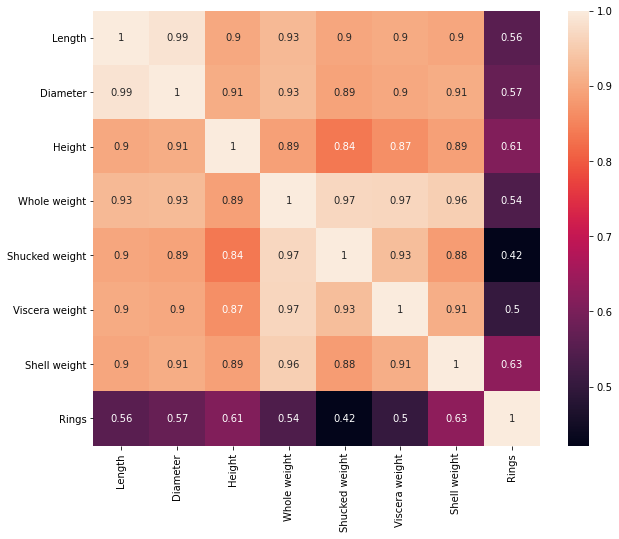

In [14]:
plt.figure(figsize=(10, 8))
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

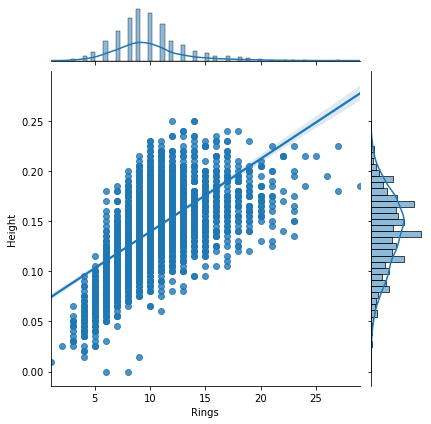

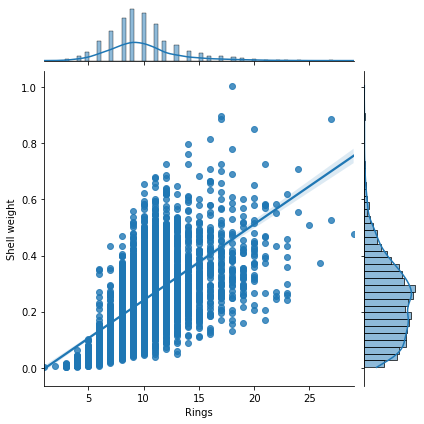

In [15]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=df, x='Rings', y='Shell weight', kind='reg')

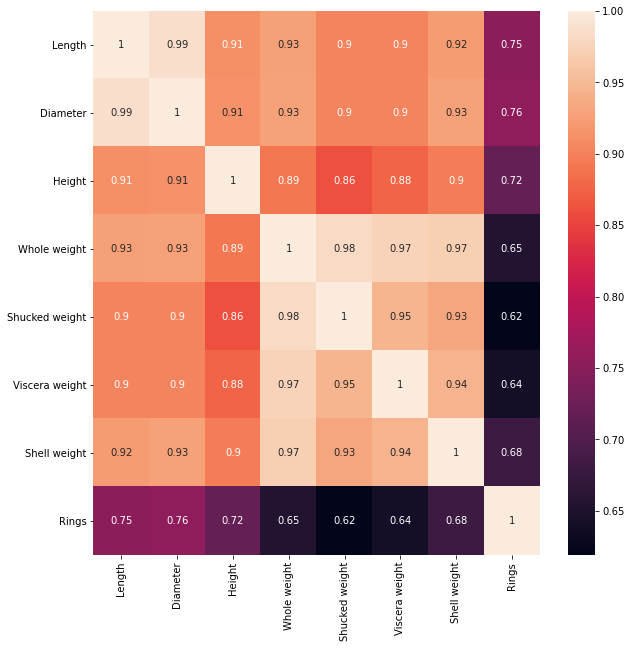

In [16]:
i_df = df[df['Rings'] < 10]

plt.figure(figsize=(10, 10))
corr = i_df.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

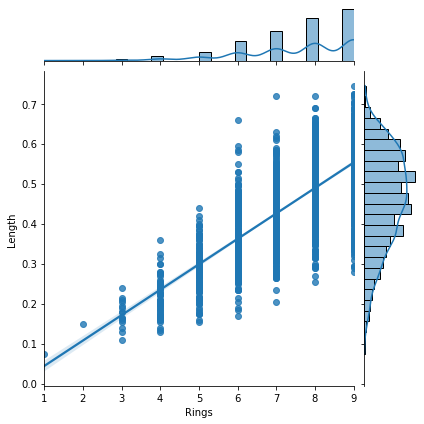

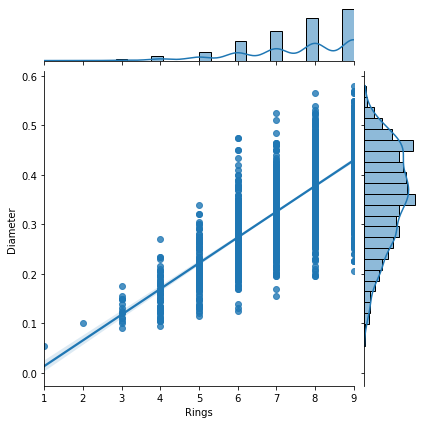

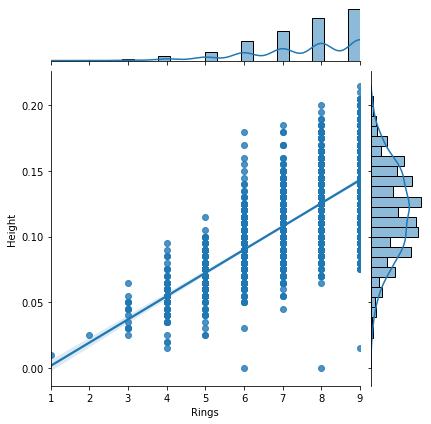

In [17]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_df, x='Rings', y='Length',  kind='reg')
_ = sns.jointplot(data=i_df, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=i_df, x='Rings', y='Height', kind='reg')

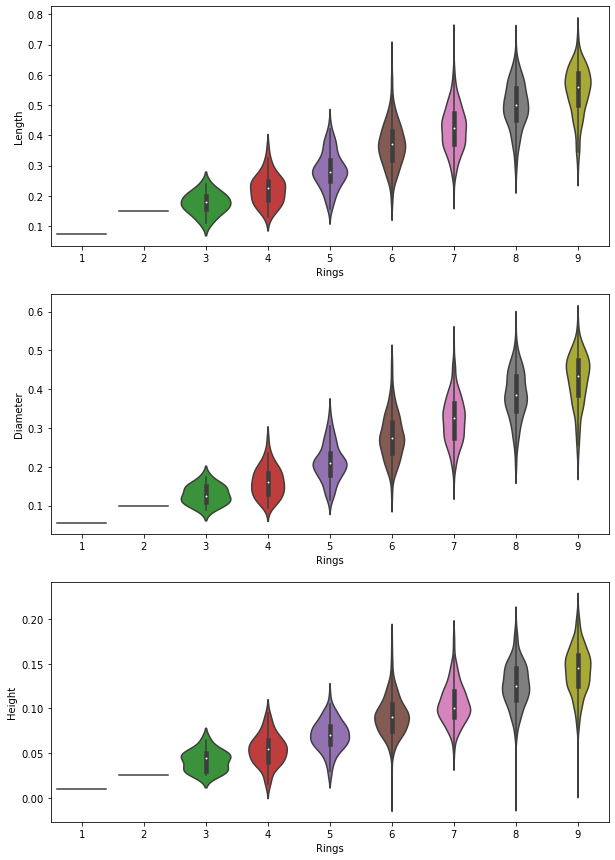

In [18]:
plt.figure(figsize=(10, 15))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_df, x='Rings', y='Length')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_df, x='Rings', y='Diameter')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_df, x='Rings', y='Height')

<Figure size 1440x360 with 0 Axes>

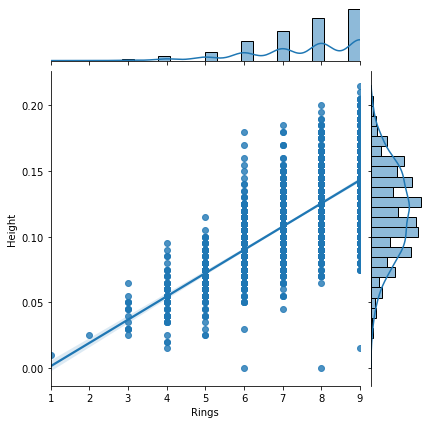

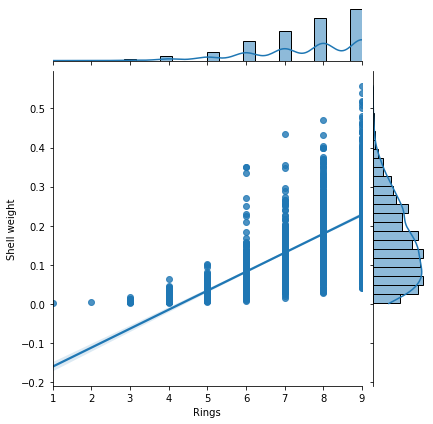

In [19]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_df, x='Rings', y='Height',  kind='reg')
_ = sns.jointplot(data=i_df, x='Rings', y='Shell weight', kind='reg')

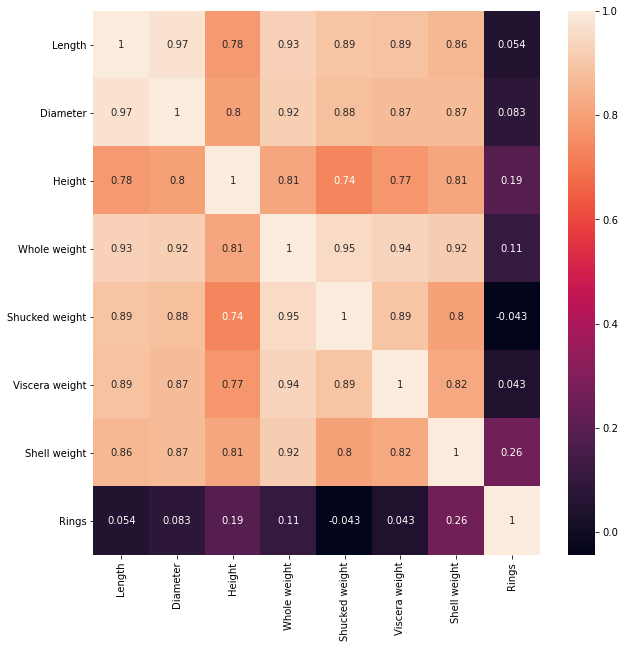

<Figure size 1440x720 with 0 Axes>

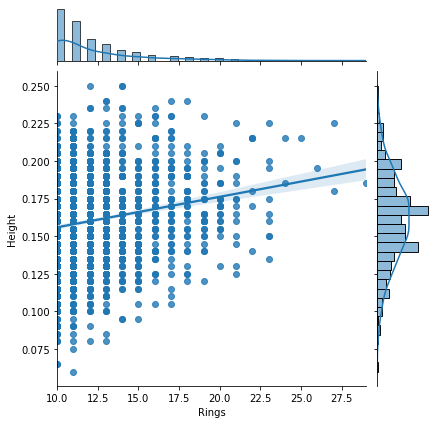

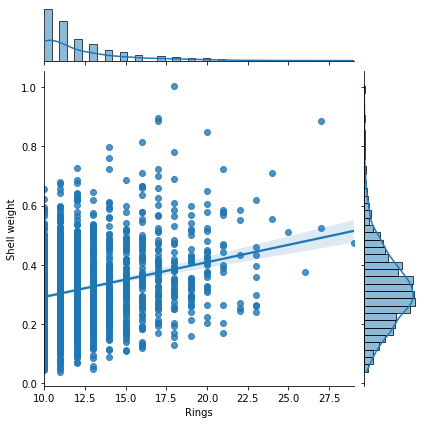

In [20]:
a_df = df[df['Rings'] >= 10]

plt.figure(figsize=(10, 10))
corr = a_df.corr()
_ = sns.heatmap(corr, annot=True)

plt.figure(figsize=(20, 10))

_ = sns.jointplot(data=a_df, y='Height', x='Rings', kind='reg')
_ = sns.jointplot(data=a_df, y='Shell weight', x='Rings', kind='reg')

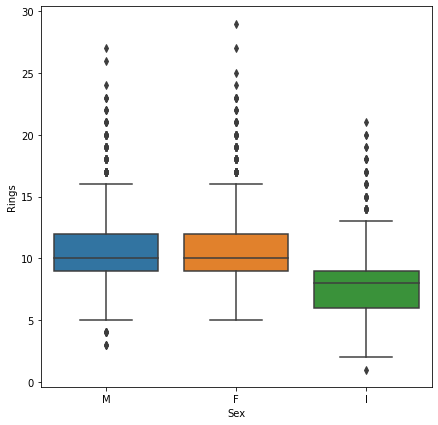

In [21]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=df, x='Sex', y='Rings')

/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/manasnayak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


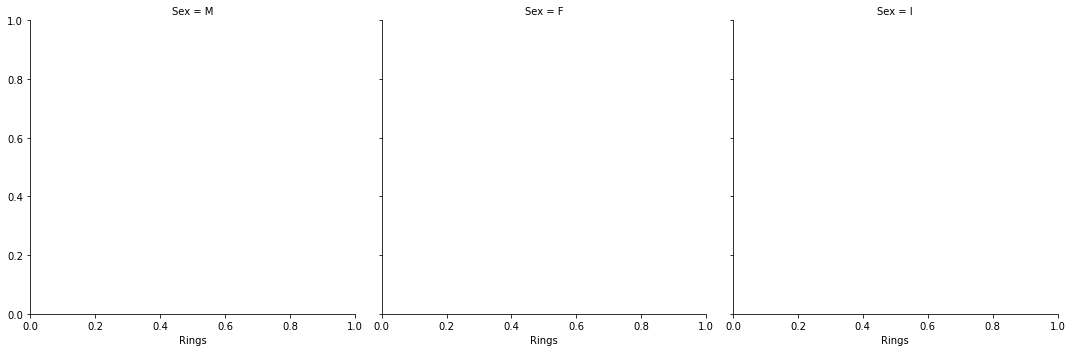

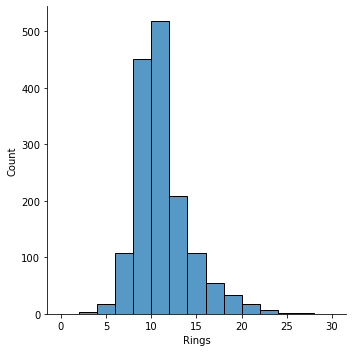

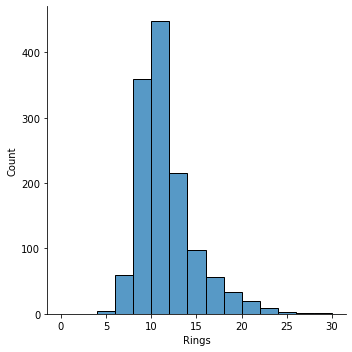

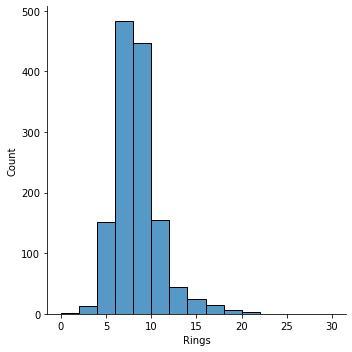

In [23]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.displot, 'Rings', kde=False, bins=range(0, 31, 2))

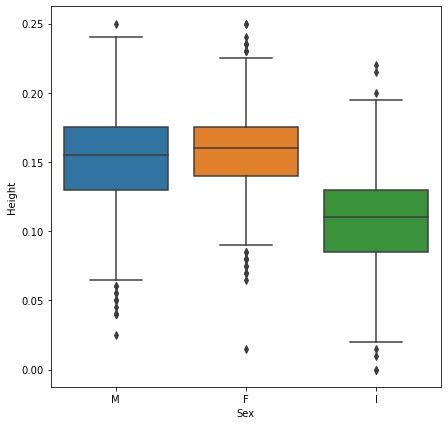

In [24]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=df, x='Sex', y='Height')

In [ ]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

In [ ]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=df, x='Sex', y='Shell weight')

In [ ]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

In [ ]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=df, x='Rings', y='Height', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=df, x='Rings', y='Shell weight', hue='Sex', fit_reg=True)